# CREDIT CARD FRAUD DETECTION

## Fraud Detection

Fraud detection is one of the top priorities for banks and financial institutions, which can be addressed using machine learning. Fraud detection problems are known for being extremely imbalanced.

In [11]:
import pandas as pd

data  = pd.read_csv("creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Columns in the Dataset :

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The columns ['V1', 'V2', .... 'V28'] are principal components reduced with PCA. Due to confidentiality reasons, the original features were not provided.
### Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
### Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [13]:
data.isnull().values.any()

False

In [14]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Degree of Imbalance using a Count plot :

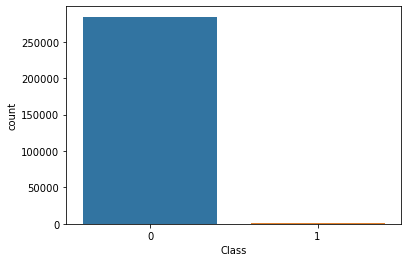

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data.Class, data = data)

### The data is highly imbalanced

In [8]:
data = data.sample(frac = 0.1, random_state = 0)
data.shape

(28481, 31)

In [16]:
Fraud = data[data.Class == 1]
Genuine = data[data.Class == 0]

n_fraud = len(Fraud)
print("No. of Fraudulent Transactions :", n_fraud)
print("No. of Genuine Transactions :", (len(data) - n_fraud))
print("Percentage of Fraudulent Transactions :", (n_fraud*100/len(data))) 

No. of Fraudulent Transactions : 492
No. of Genuine Transactions : 284315
Percentage of Fraudulent Transactions : 0.1727485630620034


## Statistical look at Amounts concerned with Fraudulent and Genuine transactions :

### Fraud

In [17]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Genuine

In [18]:
Genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Do Fraudulent transactions occur more in a certain time frame? (No, not generally)

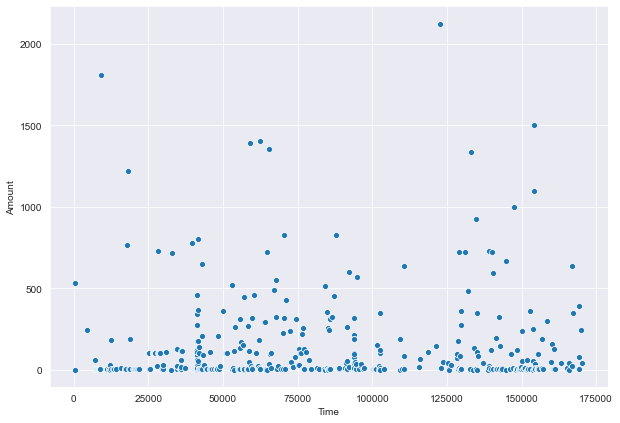

In [19]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')
ax1 = sns.scatterplot(x = Fraud.Time, y = Fraud.Amount, data = data)

## Preparing datasets for training and testing models

In [41]:
cols = [col for col in data.columns if col not in ["Class"]]

target = "Class"

X = data[cols]
Y = data[target]

import numpy as np
data_test = data.sample(frac = 0.1, random_state = 0)
data_train = data.sample(frac = 0.9, random_state = 0)

X_train = data_train[cols]
Y_train = data_train[target]

X_test = data_test[cols]
Y_test = data_test[target]

## Isolation Forest Algorithm
 
### The Isolation Forest algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this algorithm has a low linear time complexity and a small memory requirement.

## Local Outlier Factor Algorithm

### The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors. 

## Light GBM Algorithm

### Boosting is one technique that usually works well with these kind of datasets. It iteratively creates weak classifiers (decision trees) weighting the instances to increase the performance. In the first subset, a weak classifier is trained and tested on all the training data, those instances that have bad performance are weighted to appear more in the next data subset. Finally, all the classifiers are ensembled with a weighted average of their estimates.
### In LightGBM, there is a parameter called 'is_unbalance' that automatically helps you to control this issue.

In [43]:
from sklearn.ensemble import IsolationForest
def Isolation_Forest_Model(frac):
    model = IsolationForest(n_estimators = 150,
                            contamination = frac,
                            max_samples = len(X),
                            random_state = 0)
    return model

from sklearn.neighbors import LocalOutlierFactor
def LOF_Model(frac):
    model = LocalOutlierFactor(n_neighbors = 25,
                               contamination = frac,
                               leaf_size = 30,
                               metric = 'minkowski')
    return model

def Light_GBM_Params():
    params = {'num_leaves': 2**7,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'lambda_l2': 1,
              'bagging_fraction': 1,
              'objective':'binary',
              'task': 'train'}
    
    return params

In [44]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
def print_performance(model_name, y_true, y_pred):
    print(model_name)
    print("Accuracy Score :", accuracy_score(y_true, y_pred))
    print("Classification Report :")
    print(classification_report(y_true, y_pred))


In [45]:
frac = len(Fraud)/len(data)

## Isolation Forest Classifier :

In [46]:
clf1 = Isolation_Forest_Model(frac)
y_pred = clf1.fit_predict(X)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

print_performance("Isolation Forest Model", Y, y_pred)

confusion_matrix(Y, y_pred)

Isolation Forest Model
Accuracy Score : 0.9976826412272171
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807



array([[283985,    330],
       [   330,    162]], dtype=int64)

## Local Outlier Factor Classifier :

In [47]:
clf2 = LOF_Model(frac)
y_pred = clf2.fit_predict(X)

y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

print_performance("Local Outlier Factor Model", Y, y_pred)

confusion_matrix(Y, y_pred)

Local Outlier Factor Model
Accuracy Score : 0.9966995193236121
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.04      0.04      0.04       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



array([[283845,    470],
       [   470,     22]], dtype=int64)

## Light GBM Classifier :

In [57]:
import lightgbm as lgb

params = Light_GBM_Params()
lgb_train = lgb.Dataset(X_train, Y_train, free_raw_data = False)
lgb_test = lgb.Dataset(X_test, Y_test, reference = lgb_train, free_raw_data = False)

clf3 = lgb.train(params, lgb_train, num_boost_round = 300)
y_pred = clf3.predict(X_test)

for i in range(len(y_pred)):
    if(y_pred[i] < 0.5) :
        y_pred[i] = 0
    else :
        y_pred[i] = 1
print_performance("Light GBM Model", Y_test, y_pred)

confusion_matrix(Y_test, y_pred)

Light GBM Model
Accuracy Score : 0.9984199992977775
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.55      1.00      0.71        55

    accuracy                           1.00     28481
   macro avg       0.78      1.00      0.85     28481
weighted avg       1.00      1.00      1.00     28481



array([[28381,    45],
       [    0,    55]], dtype=int64)

## Conclusion

### In case of imbalanced data problems, we cannot rely on the Accuracy score at all. It would always be closer to 1 since it also considers True Negatives which would always be a relatively larger number. 
### Also, the Precision score is a better performace estimator than the Recall score. This is because a Genuine transaction labeled as Fraudulent one is way better than a Fraudulent transaction being labeled as a Genuine one. 
### In our case, the Isolation Forest Algorithm has a better Precision score than the Local Outlier Factor Algorithm but the LightGBM model has the best Precision score though evaluated on comparitively smaller test set.